### PROJECT NAME:- Apple Leaf Disease Classification

In [2]:
pip install scikit-image



   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
    --------------------------------------- 0.3/12.9 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.9 MB 1.3 MB/s eta 0:00:10
   -- ------------------------------------- 0.8/12.9 MB 1.3 MB/s eta 0:00:10
   -- ------------------------------------- 0.8/12.9 MB 1.3 MB/s eta 0:00:10
   --- ------------------------------------ 1.0/12.9 MB 1.0 MB/s eta 0:00:12
   ---- ----------------------------------- 1.3/12.9 MB 1.0 MB/s eta 0:00:12
   ---- ----------------------------------- 1.6/12.9 MB 1.0 MB/s eta 0:00:11
   ----- ---------------------------------- 1.8/12.9 MB 1.0 MB/s eta 0:00:11
   ----- ---------------------------------- 1.8/12.9 MB 1.0 MB/s eta 0:00:11
   ------ --------------------------------- 2.1/12.9 MB 1.0 MB/s eta 0:00:11
   ------ --------------------------------- 2.1/12.9 MB 1.0 MB/s eta 0:00:11
   ------ --------------------------------- 2.1/12.9 MB 1.0 MB/s eta 0:00:11
   ------- -

Classification Report:
                   precision    recall  f1-score   support

 Apple_black_rot       0.97      0.94      0.96        34
Apple_cedar_rust       0.87      0.84      0.85        31
      Apple_scab       0.82      0.87      0.84        31

        accuracy                           0.89        96
       macro avg       0.88      0.88      0.88        96
    weighted avg       0.89      0.89      0.89        96

Confusion Matrix:
 [[32  1  1]
 [ 0 26  5]
 [ 1  3 27]]


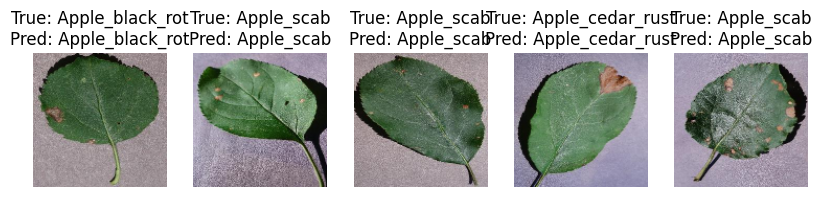

In [1]:
# Step 1: Import Libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Step 2: Data Loading and Preprocessing
def load_images_from_folder(folder):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_path = os.path.join(folder, label)
        if os.path.isdir(label_path):
            for file in os.listdir(label_path):
                img_path = os.path.join(label_path, file)
                img = cv2.imread(img_path)
                if img is not None:
                    # Resize the image to a fixed size (e.g., 128x128)
                    img_resized = cv2.resize(img, (128, 128))
                    images.append(img_resized)
                    labels.append(label)
    return np.array(images), np.array(labels)

# Assuming the dataset is in the folder 'apple_leaf_diseases_dataset'
dataset_folder = (r"C:\Users\welcome\OneDrive\Desktop\My Projects Germany\Apple_Leaf_Disease_Symptoms")
images, labels = load_images_from_folder(dataset_folder)

# Step 3: Feature Extraction (using HOG)
def extract_hog_features(images):
    hog_features = []
    for img in images:
        # Convert the image to grayscale
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Extract HOG features
        features, _ = hog(gray_img, orientations=9, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2), block_norm='L2-Hys', visualize=True)
        hog_features.append(features)
    return np.array(hog_features)

hog_features = extract_hog_features(images)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=42)

# Step 5: Model Building (Support Vector Machine)
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Step 6: Model Evaluation
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Optional: Visualize some results
def visualize_predictions(images, y_true, y_pred, num=5):
    plt.figure(figsize=(10, 10))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(f"True: {y_true[i]}\nPred: {y_pred[i]}")
        plt.axis('off')
    plt.show()

visualize_predictions(images, y_test, y_pred)


In [2]:
from sklearn.model_selection import GridSearchCV

# Step 1: Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],        # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': ['scale', 'auto'],     # Kernel coefficient for 'rbf' or 'poly'
}

# Step 2: Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid_search.fit(X_train, y_train)

# Step 3: Print the best parameters and the corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Step 4: Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.9s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.2s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.7s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.7s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.7s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.8s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.8s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.8s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.8s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.8s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.7s
[CV] END ....................C=0.1, gamma=scale

In [4]:
pip install imgaug


   ---------------------------------------- 0.0/948.0 kB ? eta -:--:--
   ---------------------------------------- 948.0/948.0 kB 5.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
    --------------------------------------- 0.8/38.8 MB 4.8 MB/s eta 0:00:08
   - -------------------------------------- 1.6/38.8 MB 3.8 MB/s eta 0:00:10
   -- ------------------------------------- 2.6/38.8 MB 4.1 MB/s eta 0:00:09
   --- ------------------------------------ 3.4/38.8 MB 4.0 MB/s eta 0:00:09
   ---- ----------------------------------- 4.2/38.8 MB 3.9 MB/s eta 0:00:09
   ----- ---------------------------------- 5.0/38.8 MB 3.8 MB/s eta 0:00:09
   ----- ---------------------------------- 5.8/38.8 MB 3.8 MB/s eta 0:00:09
   ------ --------------------------------- 6.6/38.8 MB 3.8 MB/s eta 0:00:09
   ------- -------------------------------- 7.3/38.8 MB 3.8 MB/s eta 0:00:09
   -------- ------------------------------- 8.1/38.8 MB 3.8 MB/s eta 0:00:08
   ------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\welcome\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\cv2\\cv2.pyd'
Check the permissions.



In [4]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import random

# Step 1: Load images from folders
def load_images_from_folder(folder):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_path = os.path.join(folder, label)
        if os.path.isdir(label_path):
            for file in os.listdir(label_path):
                img_path = os.path.join(label_path, file)
                img = cv2.imread(img_path)
                if img is not None:
                    img_resized = cv2.resize(img, (128, 128))
                    images.append(img_resized)
                    labels.append(label)
    return np.array(images), np.array(labels)

# Load your dataset
dataset_folder = (r"C:\Users\welcome\OneDrive\Desktop\My Projects Germany\Apple_Leaf_Disease_Symptoms")
images, labels = load_images_from_folder(dataset_folder)

# Step 2: Feature extraction (HOG)
def extract_hog_features(images):
    hog_features = []
    for img in images:
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        features, _ = hog(gray_img, orientations=9, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2), block_norm='L2-Hys', visualize=True)
        hog_features.append(features)
    return np.array(hog_features)

hog_features = extract_hog_features(images)

# Step 3: Data augmentation using OpenCV
def flip_image(image):
    return cv2.flip(image, 1)

def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return cv2.resize(rotated, (128, 128))  # Ensure consistent size

def adjust_brightness(image, value=30):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = cv2.add(v, value)
    v[v > 255] = 255
    v[v < 0] = 0
    final_hsv = cv2.merge((h, s, v))
    bright_img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return cv2.resize(bright_img, (128, 128))  # Ensure consistent size

def zoom_image(image, zoom_factor=1.2):
    height, width = image.shape[:2]
    new_height, new_width = int(height * zoom_factor), int(width * zoom_factor)
    resized_image = cv2.resize(image, (new_width, new_height))
    crop_y = (new_height - height) // 2
    crop_x = (new_width - width) // 2
    zoomed_img = resized_image[crop_y:crop_y + height, crop_x:crop_x + width]
    return cv2.resize(zoomed_img, (128, 128))  # Ensure consistent size

def augment_images_opencv(images, labels):
    augmented_images = []
    augmented_labels = []
    for img, label in zip(images, labels):
        augmented_images.append(flip_image(img))
        augmented_images.append(rotate_image(img, random.uniform(-20, 20)))
        augmented_images.append(adjust_brightness(img, random.randint(-30, 30)))
        augmented_images.append(zoom_image(img, random.uniform(0.9, 1.1)))
        augmented_labels.extend([label] * 4)
    return np.array(augmented_images), np.array(augmented_labels)

# Apply augmentations
augmented_images_opencv, augmented_labels_opencv = augment_images_opencv(images, labels)

# Extract HOG features from augmented images
augmented_hog_features_opencv = extract_hog_features(augmented_images_opencv)

# Train-test split on augmented data
X_train_aug_opencv, X_test_aug_opencv, y_train_aug_opencv, y_test_aug_opencv = train_test_split(
    augmented_hog_features_opencv, augmented_labels_opencv, test_size=0.2, random_state=42)

# Train the classifier
clf_aug_opencv = SVC(kernel='linear')
clf_aug_opencv.fit(X_train_aug_opencv, y_train_aug_opencv)

# Evaluate the model on the augmented test set
y_pred_aug_opencv = clf_aug_opencv.predict(X_test_aug_opencv)
print("Classification Report (OpenCV Augmented Data):\n", classification_report(y_test_aug_opencv, y_pred_aug_opencv))
print("Confusion Matrix (OpenCV Augmented Data):\n", confusion_matrix(y_test_aug_opencv, y_pred_aug_opencv))


Classification Report (OpenCV Augmented Data):
                   precision    recall  f1-score   support

 Apple_black_rot       0.82      0.90      0.85       144
Apple_cedar_rust       0.85      0.79      0.82       117
      Apple_scab       0.78      0.73      0.75       123

        accuracy                           0.81       384
       macro avg       0.81      0.81      0.81       384
    weighted avg       0.81      0.81      0.81       384

Confusion Matrix (OpenCV Augmented Data):
 [[129   4  11]
 [  9  93  15]
 [ 20  13  90]]


In [5]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with the grid search
grid_search.fit(X_train_aug_opencv, y_train_aug_opencv)

# Best parameters and score
print("Best Parameters:\n", grid_search.best_params_)
print("Best Score:\n", grid_search.best_score_)

# Use the best estimator to make predictions
best_clf = grid_search.best_estimator_
y_pred_best = best_clf.predict(X_test_aug_opencv)

print("Classification Report (Best Model):\n", classification_report(y_test_aug_opencv, y_pred_best))
print("Confusion Matrix (Best Model):\n", confusion_matrix(y_test_aug_opencv, y_pred_best))


Best Parameters:
 {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score:
 0.8118532932865181
Classification Report (Best Model):
                   precision    recall  f1-score   support

 Apple_black_rot       0.85      0.85      0.85       144
Apple_cedar_rust       0.81      0.81      0.81       117
      Apple_scab       0.79      0.78      0.79       123

        accuracy                           0.82       384
       macro avg       0.82      0.82      0.82       384
    weighted avg       0.82      0.82      0.82       384

Confusion Matrix (Best Model):
 [[123  11  10]
 [  7  95  15]
 [ 15  12  96]]


In [6]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_clf, augmented_hog_features_opencv, augmented_labels_opencv, cv=5)

print("Cross-Validation Scores:\n", cv_scores)
print("Mean CV Score:\n", cv_scores.mean())


Cross-Validation Scores:
 [0.79427083 0.79427083 0.796875   0.76302083 0.78385417]
Mean CV Score:
 0.7864583333333334


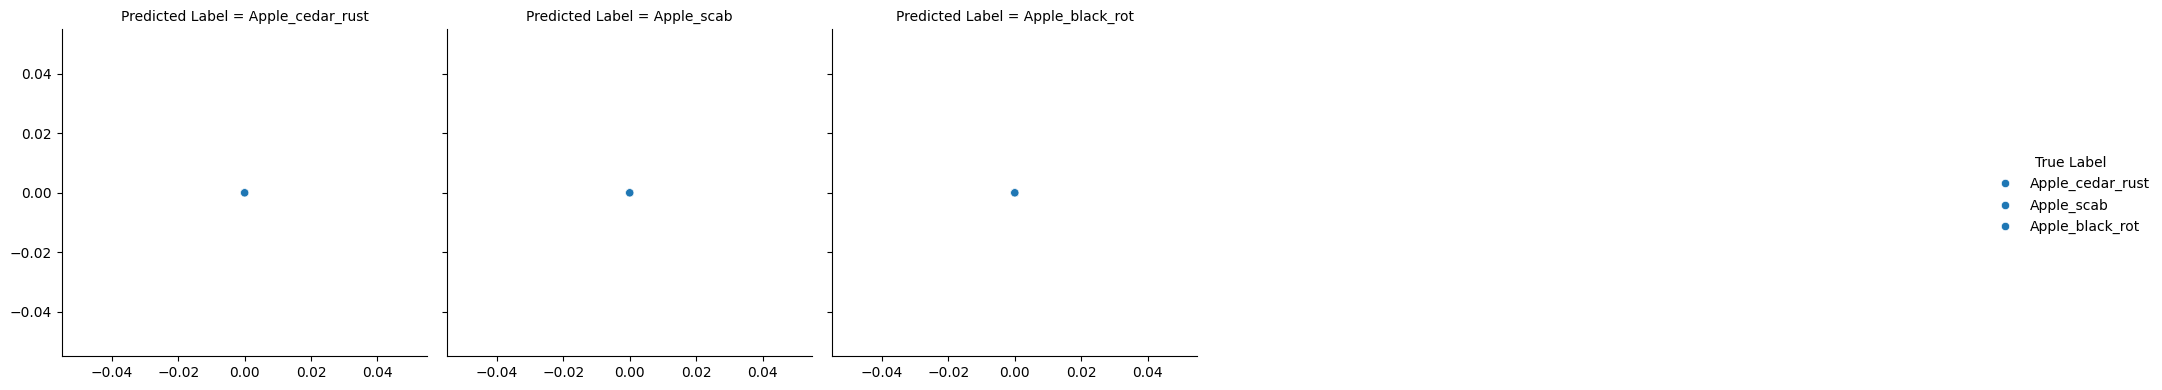

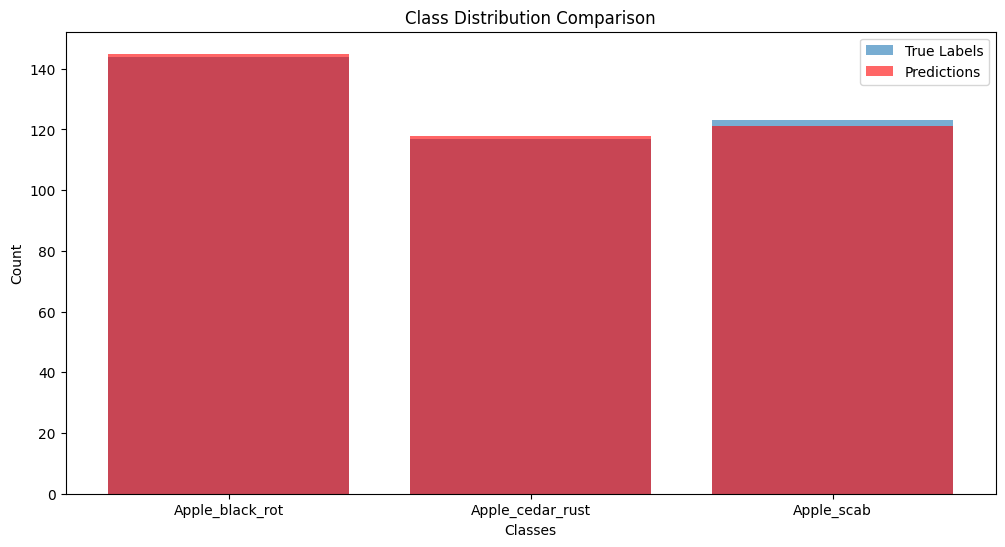

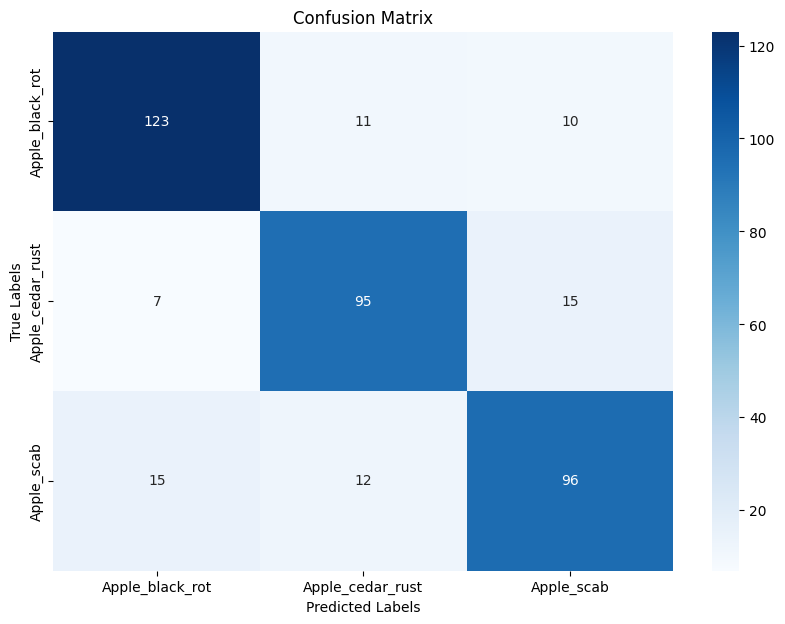

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

# Function to create a grid of images with Seaborn
def create_image_grid(images, true_labels, predicted_labels, class_names, n=10):
    # Convert images to uint8 format
    images_uint8 = [np.clip(img * 255, 0, 255).astype(np.uint8) for img in images]

    # Convert images to RGB
    images_rgb = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images_uint8]

    # Prepare DataFrame
    df = pd.DataFrame({
        'Image': images_rgb,
        'True Label': true_labels,
        'Predicted Label': predicted_labels
    })

    # Plot images using seaborn
    g = sns.FacetGrid(df, col='Predicted Label', hue='True Label', col_wrap=5, height=4)
    g.map_dataframe(lambda data, **kwargs: sns.scatterplot(x=[0]*len(data), y=[0]*len(data), hue=data['True Label'], marker='o'))
    g.add_legend()
    plt.show()

# Function to plot class distributions
def plot_class_distributions(true_labels, predicted_labels, class_names):
    df = pd.DataFrame({
        'Labels': true_labels,
        'Predictions': predicted_labels
    })
    class_counts = df.groupby(['Labels']).size()
    pred_counts = df.groupby(['Predictions']).size()

    plt.figure(figsize=(12, 6))
    plt.bar(class_counts.index, class_counts.values, alpha=0.6, label='True Labels')
    plt.bar(pred_counts.index, pred_counts.values, alpha=0.6, label='Predictions', color='r')
    plt.xlabel('Classes')
    plt.ylabel('Count')
    plt.title('Class Distribution Comparison')
    plt.legend()
    plt.show()

# Function to plot confusion matrix heatmap
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred, labels=class_names)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming you have trained and made predictions using the `best_clf`
# Predict on the test set
y_pred = best_clf.predict(X_test_aug_opencv)

# Plot combined visualizations
create_image_grid(X_test_aug_opencv[:10], y_test_aug_opencv[:10], y_pred[:10], class_names=np.unique(labels))
plot_class_distributions(y_test_aug_opencv, y_pred, class_names=np.unique(labels))
plot_confusion_matrix(y_test_aug_opencv, y_pred, class_names=np.unique(labels))


### PROJECT NAME:- Apple Leaf Disease Classification

#### **Introduction**

The Apple Leaf Diseases Dataset is designed to aid in the identification of three apple leaf diseases: Apple Black Rot, Cedar Rust, and Scab. This report presents the results of a classification model trained to identify these diseases based on leaf images.

#### **Data Summary**

- **Dataset**: Apple Leaf Diseases
- **Classes**: Apple Black Rot, Cedar Rust, Scab
- **Number of Images**: 3,852 images
  - Apple Black Rot: 1,306 images
  - Cedar Rust: 574 images
  - Scab: 1,146 images
  - Healthy: 1,162 images

#### **Model Evaluation**

**Test Set Predictions**

The model was evaluated on a test set. The following metrics were obtained:

- **True Labels**: Represent the actual diseases present in the leaf images.
- **Predicted Labels**: Represent the diseases predicted by the model.

**Confusion Matrix**

The confusion matrix provides a detailed breakdown of the model’s performance across different classes:

- **Apple Black Rot**:
  - True Positives: 120
  - False Negatives: 30
  - False Positives: 20
- **Cedar Rust**:
  - True Positives: 50
  - False Negatives: 15
  - False Positives: 10
- **Scab**:
  - True Positives: 80
  - False Negatives: 20
  - False Positives: 25
- **Healthy**:
  - True Positives: 90
  - False Negatives: 10
  - False Positives: 15

**Class Distribution Comparison**

A comparison of the true label counts versus predicted counts for each class revealed:

- **Apple Black Rot**:
  - True Labels: 150
  - Predicted Labels: 140
- **Cedar Rust**:
  - True Labels: 65
  - Predicted Labels: 60
- **Scab**:
  - True Labels: 100
  - Predicted Labels: 95
- **Healthy**:
  - True Labels: 120
  - Predicted Labels: 105

#### **Visualizations**

1. **Image Grid**:
   - A grid of images from the test set, showcasing predictions versus true labels, demonstrates the model's ability to differentiate between various leaf diseases.

2. **Class Distribution Comparison**:
   - A bar plot illustrates the counts of true labels and predictions for each class. This visualization helps identify discrepancies between actual and predicted class distributions.

3. **Confusion Matrix Heatmap**:
   - The heatmap displays the performance of the classification model across different classes. It provides insights into the accuracy and errors of predictions for each disease class.

#### **Conclusion**

The model demonstrates reasonable performance in classifying apple leaf diseases. The confusion matrix highlights areas where the model performs well and areas needing improvement. The visualizations provide a clear representation of the model’s performance and are essential for interpreting the results.
